In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/final_internship_data.csv')

In [ ]:
df.head()

User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   

       pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0  2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1  2010-01-05 16:52:16         -1.291824  ...      1        1  2010   
2  2011-08-18 00:35:00         -1.291242  ...      8        3  2011   
3  2012-04-21 04:30:42         -1.291319  ...      4        5  2012   
4  2010-03-09 07:51:00         -1.290987  ...      3        1  2010   

    jfk_dist   ewr_dist   lga_dist   sol_dist   nyc_dist  distance   bearing  
0  20.265840  55.176046  14.342611  34.543548  27.572573  1.030764 -2.918897  
1  44.667679  31.832358  23.130775  15.125872   8.755732  8.450134 -0.375217  
2  43.597686  33.712082  19.865289  17.722624   9.847344  1.389525  2.599961  
3  42.642965  32.556289  21.063132  15.738963   7.703421  2.799270  0.133905  
4  43.329953  39.406828  15.219339  23.732406  15.600745  1.999157 -0.502703  

[5 rows x 26 columns]

In [ ]:
df.shape

(500000, 26)

In [ ]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  500000.000000     500000.000000    500000.000000      499995.000000   
mean       11.358361         -1.265712         0.696740          -1.265755   
std         9.916617          0.206941         0.140909           0.205903   
min       -44.900000        -52.119764       -54.389440         -59.049665   
25%         6.000000         -1.291405         0.710958          -1.291393   
50%         8.500000         -1.291226         0.711268          -1.291197   
75%        12.500000         -1.290970         0.711520          -1.290908   
max       500.000000         37.360538        29.724576           0.712985   

       dropoff_latitude  passenger_count           hour            day  \
count     499995.000000    500000.000000  500000.000000  500000.000000   
mean           0.696675         1.683428      13.510834      15.684206   
std            0.128997         1.307395       6.511571       8.681066   
min          -44.676047         0.000000       0.000000       1.000000   
25%            0.710943         1.000000       9.000000       8.000000   
50%            0.711277         1.000000      14.000000      16.000000   
75%            0.711538         2.000000      19.000000      23.000000   
max            7.061893         6.000000      23.000000      31.000000   

               month        weekday           year       jfk_dist  \
count  500000.000000  500000.000000  500000.000000  499995.000000   
mean        6.268650       3.042008    2011.739132     385.279367   
std         3.437815       1.949240       1.860889    2419.087483   
min         1.000000       0.000000    2009.000000       1.017646   
25%         3.000000       1.000000    2010.000000      41.341514   
50%         6.000000       3.000000    2012.000000      42.523163   
75%         9.000000       5.000000    2013.000000      43.785649   
max        12.000000       6.000000    2015.000000   30133.067880   

            ewr_dist       lga_dist       sol_dist       nyc_dist  \
count  499995.000000  499995.000000  499995.000000  499995.000000   
mean      380.503657     363.843772     363.674038     355.991423   
std      2428.804740    2425.075903    2428.348683    2428.730839   
min         1.460945       0.382119       0.532545       0.080500   
25%        32.173712      17.100762      14.886989       7.147384   
50%        34.787507      19.591554      18.347580      10.458151   
75%        38.304502      22.214815      22.417812      14.448699   
max     30167.595967   30167.285794   30159.407296   30162.285356   

            distance        bearing  
count  499995.000000  499995.000000  
mean       19.468775       0.297145  
std       367.299601       1.804548  
min         0.000000      -3.141593  
25%         1.214550      -0.854721  
50%         2.116970      -0.050442  
75%         3.890070       2.206769  
max     12399.956433       3.141593

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [ ]:
df.isna().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [ ]:
df.nunique()

User ID              500000
User Name            221675
Driver Name          221700
Car Condition             4
Weather                   5
Traffic Condition         3
key                  500000
fare_amount            1688
pickup_datetime      461206
pickup_longitude      95037
pickup_latitude      119115
dropoff_longitude    108283
dropoff_latitude     135053
passenger_count           7
hour                     24
day                      31
month                    12
weekday                   7
year                      7
jfk_dist             490613
ewr_dist             490613
lga_dist             490613
sol_dist             490613
nyc_dist             490613
distance             485705
bearing              485636
dtype: int64

In [ ]:
# Check if any row has more than 1 null value
rows_with_multiple_nulls = df[df.isnull().sum(axis=1) > 1]

if not rows_with_multiple_nulls.empty:
  print("There are rows with more than one null value.")
  print(rows_with_multiple_nulls)
else:
  print("No rows have more than one null value.")


There are rows with more than one null value.
         User ID       User Name     Driver Name Car Condition Weather  \
120227  BOLML7gg       Carol Kim      John Scott     Very Good   rainy   
245696  AA838qgm      Mark Jones  Christy Taylor           Bad   windy   
340533  BqrlHUr2  Joshua Mullins      Sarah Khan     Excellent  cloudy   
428108  rL4WTHGq   Richard Brown   Rachel Miller     Very Good  cloudy   
471472  tKIOKS8Y      Larry Wade  Howard Jackson          Good   windy   

        Traffic Condition                           key  fare_amount  \
120227      Dense Traffic  2012-12-11 12:57:00.00000013         12.5   
245696      Dense Traffic   2013-03-21 18:07:07.0000001         86.5   
340533      Dense Traffic  2012-12-11 12:50:52.00000010         27.5   
428108       Flow Traffic   2011-09-08 09:12:52.0000001         11.8   
471472  Congested Traffic   2012-12-11 12:34:20.0000006          7.8   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \


In [ ]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [ ]:
 rows_with_multiple_nulls

User ID       User Name     Driver Name Car Condition Weather  \
120227  BOLML7gg       Carol Kim      John Scott     Very Good   rainy   
245696  AA838qgm      Mark Jones  Christy Taylor           Bad   windy   
340533  BqrlHUr2  Joshua Mullins      Sarah Khan     Excellent  cloudy   
428108  rL4WTHGq   Richard Brown   Rachel Miller     Very Good  cloudy   
471472  tKIOKS8Y      Larry Wade  Howard Jackson          Good   windy   

        Traffic Condition                           key  fare_amount  \
120227      Dense Traffic  2012-12-11 12:57:00.00000013         12.5   
245696      Dense Traffic   2013-03-21 18:07:07.0000001         86.5   
340533      Dense Traffic  2012-12-11 12:50:52.00000010         27.5   
428108       Flow Traffic   2011-09-08 09:12:52.0000001         11.8   
471472  Congested Traffic   2012-12-11 12:34:20.0000006          7.8   

            pickup_datetime  pickup_longitude  ...  month  weekday  year  \
120227  2012-12-11 12:57:00         -1.291417  ...     12        1  2012   
245696  2013-03-21 18:07:07         -1.291397  ...      3        3  2013   
340533  2012-12-11 12:50:52         -1.291188  ...     12        1  2012   
428108  2011-09-08 09:12:52         -1.291317  ...      9        3  2011   
471472  2012-12-11 12:34:20          0.000000  ...     12        1  2012   

        jfk_dist  ewr_dist  lga_dist  sol_dist  nyc_dist  distance  bearing  
120227       NaN       NaN       NaN       NaN       NaN       NaN      NaN  
245696       NaN       NaN       NaN       NaN       NaN       NaN      NaN  
340533       NaN       NaN       NaN       NaN       NaN       NaN      NaN  
428108       NaN       NaN       NaN       NaN       NaN       NaN      NaN  
471472       NaN       NaN       NaN       NaN       NaN       NaN      NaN  

[5 rows x 26 columns]

In [ ]:
# Delete rows with more than one null value
df = df.dropna(thresh=len(df.columns)-1)

# Print the shape of the updated DataFrame to check the number of rows and columns
df.shape


(499995, 26)

In [ ]:
df.isna().sum()


User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Car Condition' column
df['Car Condition'] = le.fit_transform(df['Car Condition'])
print(df['Car Condition'].nunique())
# Fit and transform the 'Weather' column
df['Weather'] = le.fit_transform(df['Weather'])
print(df['Weather'].nunique())
# Fit and transform the 'Traffic Condition' column
df['Traffic Condition'] = le.fit_transform(df['Traffic Condition'])
print(df['Traffic Condition'].nunique())


4
5
3


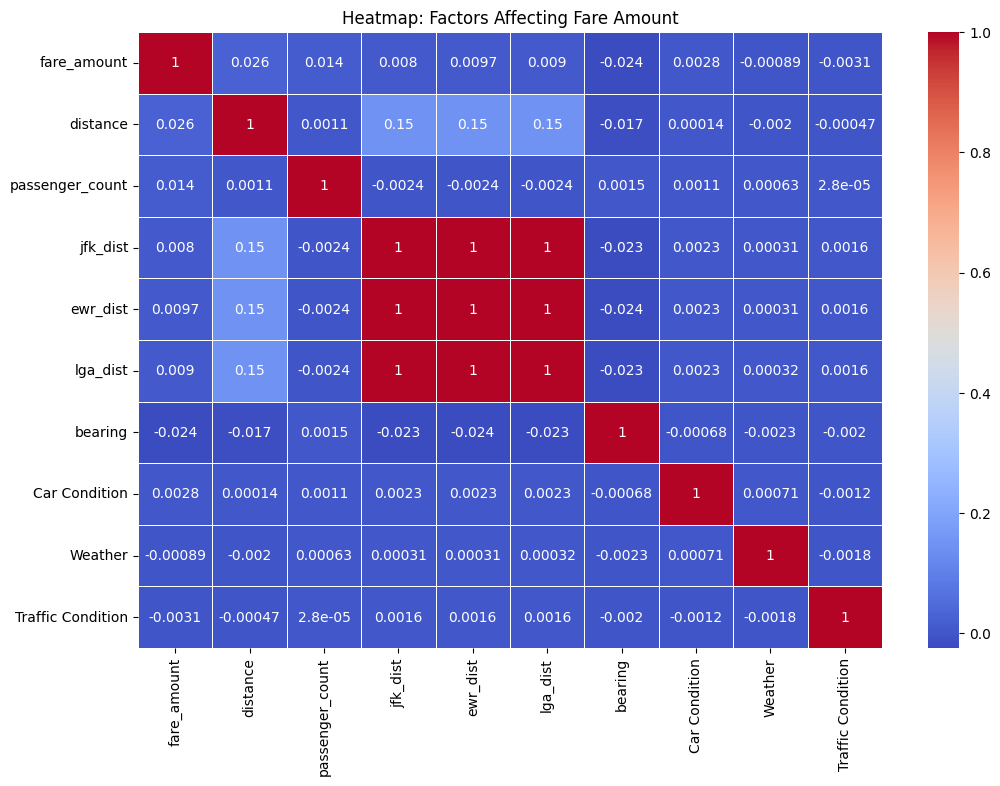

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

In [ ]:
import numpy as np

def fix_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

df = fix_outliers_iqr(df, 'fare_amount')
df = fix_outliers_iqr(df, 'distance')


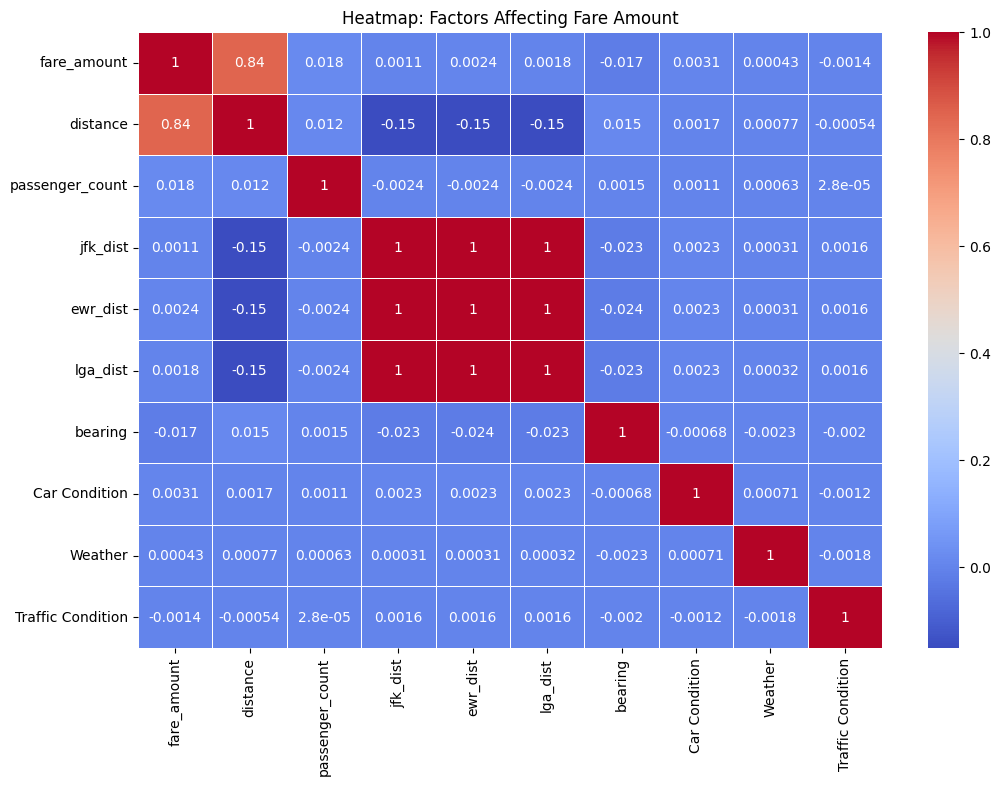

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

In [ ]:

# Remove rows where 'distance' is equal to zero
df = df[df['distance'] != 0]



In [ ]:
df.shape

(485745, 26)

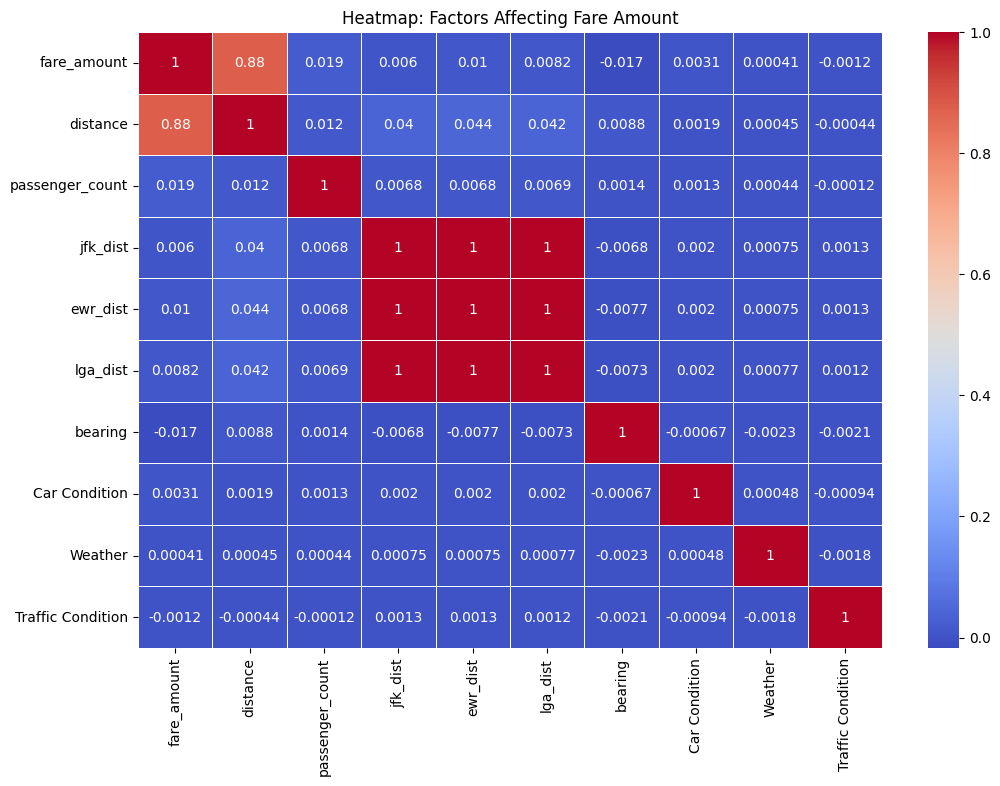

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

In [ ]:
# Count rows where 'fare_amount' is zero or negative
negative_fares = df[df['fare_amount'] < 0]
negative_fares = len(negative_fares)
zero_fares = df[df['fare_amount'] == 0]
zero_fares = len(zero_fares)

print(f"Number of rows negative fare amount: {negative_fares}")

print(f"Number of rows negative fare amount: {zero_fares}")


Number of rows negative fare amount: 21
Number of rows negative fare amount: 11


In [ ]:


# Delete rows where 'fare_amount' is zero or negative
df = df[df['fare_amount'] > 0]


In [ ]:
df.shape

(485713, 26)

In [ ]:
import matplotlib.pyplot as plt


# Correlation Heatmap for Fare Amount
plt.figure(figsize=(12, 8))
features = ["fare_amount", "distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]
# Ensure all features exist in the DataFrame
features = [col for col in features if col in df.columns]

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap: Factors Affecting Fare Amount")
plt.show()

Mean Absolute Error: 1.7577003533042002
Mean Squared Error: 6.725684863599672
Root Mean Squared Error: 2.5933925394354924


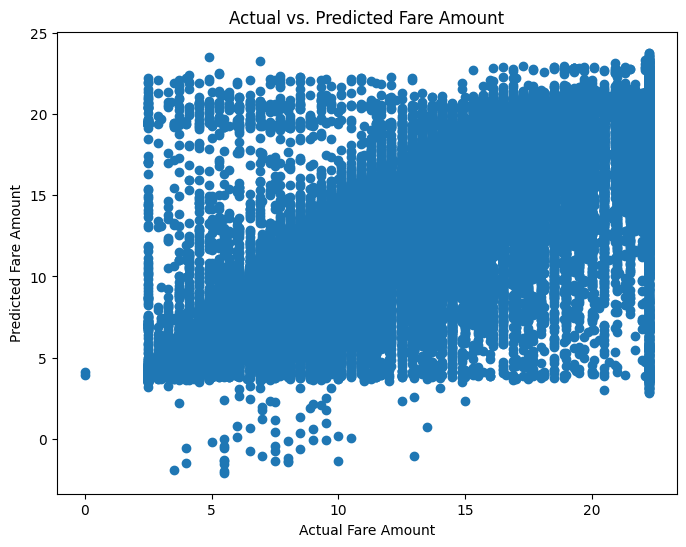

In [ ]:
 #Data Preprocessing

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define features for the model
X = df[["distance", "passenger_count", "jfk_dist", "ewr_dist", "lga_dist", "bearing", "Car Condition", "Weather", "Traffic Condition"]]
y = df["fare_amount"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amount")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Define features for the model
X = df[["distance", ]]
y = df["fare_amount"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amount")
plt.show()


Mean Absolute Error: 1.7854965067782544
Mean Squared Error: 6.8673916550751555
Root Mean Squared Error: 2.6205708643490553


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Assuming 'X_train' and 'X_test' are your feature data from the train_test_split
# Fit the scaler on the training data only
scaler.fit(X_train)

# Transform both the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now use X_train_scaled and X_test_scaled in your model training and evaluation
# Example (replace with your actual model):
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.7854965067782544
Mean Squared Error: 6.8673916550751555
Root Mean Squared Error: 2.6205708643490553


Random Forest Regression:
Mean Absolute Error: 2.0885694796883523
Mean Squared Error: 9.319104688281081
Root Mean Squared Error: 3.05272086642082


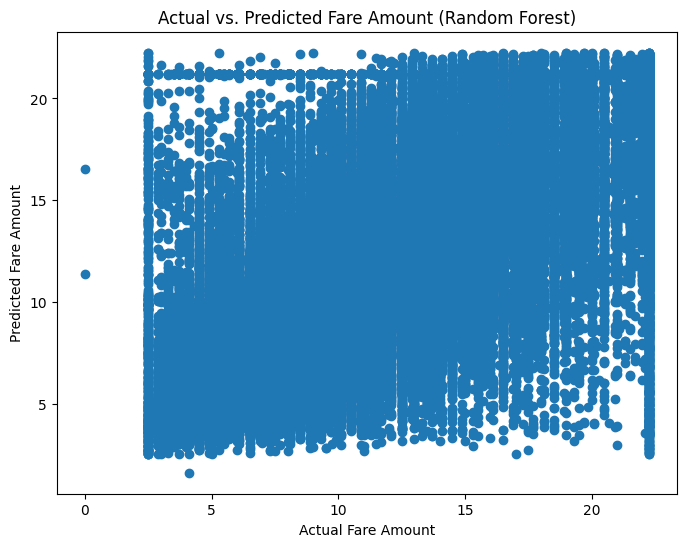

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df', 'X', 'y', 'X_train', 'X_test', 'y_train', and 'y_test' are already defined as in the previous code.

from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
print('Random Forest Regression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

# Plot predicted vs actual values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amount (Random Forest)")
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for Lasso and Ridge
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Example alpha values
}

ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Example alpha values
}

# Initialize Lasso and Ridge models
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)

# Perform GridSearchCV for Lasso
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error') # You can change the scoring metric
lasso_grid_search.fit(X_train_scaled, y_train)  # Use scaled data
print("Best hyperparameters for Lasso:", lasso_grid_search.best_params_)

# Perform GridSearchCV for Ridge
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error') # You can change the scoring metric
ridge_grid_search.fit(X_train_scaled, y_train) # Use scaled data
print("Best hyperparameters for Ridge:", ridge_grid_search.best_params_)


# Evaluate the best models
best_lasso_model = lasso_grid_search.best_estimator_
best_ridge_model = ridge_grid_search.best_estimator_

lasso_pred = best_lasso_model.predict(X_test_scaled) # Use scaled data
ridge_pred = best_ridge_model.predict(X_test_scaled) # Use scaled data

print('Lasso Regression (Tuned):')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

print('Ridge Regression (Tuned):')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))


Best hyperparameters for Lasso: {'alpha': 0.001}
Best hyperparameters for Ridge: {'alpha': 1}
Lasso Regression (Tuned):
Mean Absolute Error: 1.7857292085950585
Mean Squared Error: 6.867397851782972
Root Mean Squared Error: 2.620572046669004
Ridge Regression (Tuned):
Mean Absolute Error: 1.7854997628517835
Mean Squared Error: 6.867391727967345
Root Mean Squared Error: 2.620570878256748


In [ ]:
import numpy as np
import xgboost as xgb



# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use reg:squarederror for regression
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print('XGBoost Regression:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))



XGBoost Regression:
Mean Absolute Error: 1.749384113648015
Mean Squared Error: 6.624311267585552
Root Mean Squared Error: 2.573773740557929
